# Import libraries

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [208]:
df=pd.read_csv('logistique.csv')

In [209]:
df

,datedecreationdecommande,providerservice_id,dateexpe
0,2019-11-01 11:40:35.9930000,48,02/11/2019
1,2019-11-01 11:40:35.9700000,48,02/11/2019
2,2019-11-01 10:24:40.8930000,48,02/11/2019
3,2019-11-01 14:24:21.1770000,48,02/11/2019
4,2019-11-01 13:28:35.7900000,48,02/11/2019
...,...,...,...
572836,2019-12-16 06:12:25.2170000,48,17/12/2019
572837,2019-12-16 06:12:25.4630000,48,17/12/2019
572838,2019-12-15 22:32:36.3200000,48,17/12/2019
572839,2019-12-15 20:06:55.0670000,48,17/12/2019


# Step 1 : Exploratory Data Analysis & Data Processing


In [210]:
print('The DataFrame contains {} lines and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame contains 572841 lines and 3 columns


In [211]:
df.dtypes # Dates are in str type and the provider_id is an integer

datedecreationdecommande    object
providerservice_id           int64
dateexpe                    object
dtype: object

In [212]:
df.isnull().sum() # There is no null value

datedecreationdecommande    0
providerservice_id          0
dateexpe                    0
dtype: int64

In [213]:
df['datedecreationdecommande']=pd.to_datetime(df['datedecreationdecommande'])
df['dateexpe']=pd.to_datetime(df['dateexpe'],format="%d/%m/%Y")

In [214]:
df=df[df['datedecreationdecommande'] < df['dateexpe']]
# There are lines that have an expedition date ulterior to the creation date which is invalid data

In [215]:
df

,datedecreationdecommande,providerservice_id,dateexpe
0,2019-11-01 11:40:35.993,48,2019-11-02
1,2019-11-01 11:40:35.970,48,2019-11-02
2,2019-11-01 10:24:40.893,48,2019-11-02
3,2019-11-01 14:24:21.177,48,2019-11-02
4,2019-11-01 13:28:35.790,48,2019-11-02
...,...,...,...
572836,2019-12-16 06:12:25.217,48,2019-12-17
572837,2019-12-16 06:12:25.463,48,2019-12-17
572838,2019-12-15 22:32:36.320,48,2019-12-17
572839,2019-12-15 20:06:55.067,48,2019-12-17


# créer variable delay à partir de l'heure et fixer à minuit tout les autres pour différencier nuit et jour (target), 
Or categorize ID provider (we have 8 differents providers to distinct them between each other), the week of the year,  
-	the month of the year  
-	the day of the week (dt. day names)  
-	the hour of the day ( then categorize day,night or afternoon)  
-	the number of commands the day before in order to see if they have a lot of work at the moment  
-	Guess the total stock  



In [216]:
df=df[df['dateexpe']>'2019-07-26'] # Removing data in 1980 which is considered as noise

In [217]:
print(pd.DatetimeIndex(df['dateexpe']).unique())
len(pd.DatetimeIndex(df['dateexpe']).unique())
#Here are dates on the Dataframe, we have 46 days of history

DatetimeIndex(['2019-11-02', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10',
               '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18',
               '2019-11-19', '2019-11-21', '2019-11-20', '2019-11-22',
               '2019-11-23', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13',
               '2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17',
               '2019-11-24'],
              dtype='datetime64[ns]', name='dateexpe', freq=None)


45

In [218]:
df['delay_seconds']=(df['dateexpe']-df['datedecreationdecommande']).dt.total_seconds()

In [219]:
df['delay_days']=(df['dateexpe']-df['datedecreationdecommande']).dt.days

In [220]:
df

,datedecreationdecommande,providerservice_id,dateexpe,delay_seconds,delay_days
0,2019-11-01 11:40:35.993,48,2019-11-02,44364.007,0
1,2019-11-01 11:40:35.970,48,2019-11-02,44364.030,0
2,2019-11-01 10:24:40.893,48,2019-11-02,48919.107,0
3,2019-11-01 14:24:21.177,48,2019-11-02,34538.823,0
4,2019-11-01 13:28:35.790,48,2019-11-02,37884.210,0
...,...,...,...,...,...
572836,2019-12-16 06:12:25.217,48,2019-12-17,64054.783,0
572837,2019-12-16 06:12:25.463,48,2019-12-17,64054.537,0
572838,2019-12-15 22:32:36.320,48,2019-12-17,91643.680,1
572839,2019-12-15 20:06:55.067,48,2019-12-17,100384.933,1


In [221]:
df['providerservice_id']=df['providerservice_id'].astype('category')
## Encoding on provider_id to categorize the data 

### Visualize the evolution of sales

In [222]:
df1=df.drop(['delay_seconds','delay_days','providerservice_id'],axis=1)

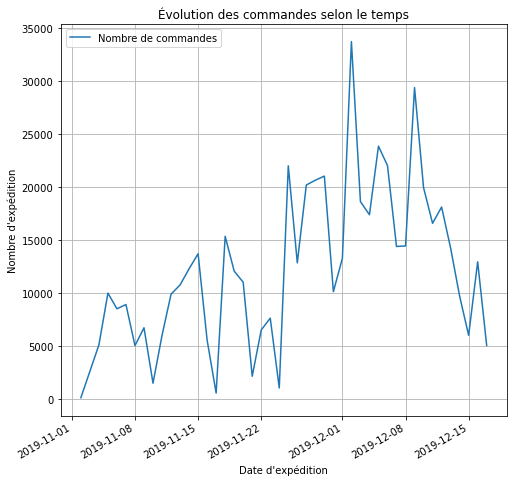

In [223]:
df1.groupby(['dateexpe']).count().plot(figsize=(8, 8))
plt.xlabel("Date d'expédition")
plt.xticks()
plt.ylabel("Nombre d'expédition")
plt.legend(['Nombre de commandes'])
plt.title('Évolution des commandes selon le temps')
plt.grid()

## See number of commands by day and by provider

In [224]:
df2=df.drop(['delay_seconds','delay_days'],axis=1)
df2_grouped=df2.groupby(['dateexpe','providerservice_id']).count()

In [225]:
provider_id_list=['5','7','16','20','21','42','48','92']
legend_2=['Provider n°'+i for i in provider_id_list]

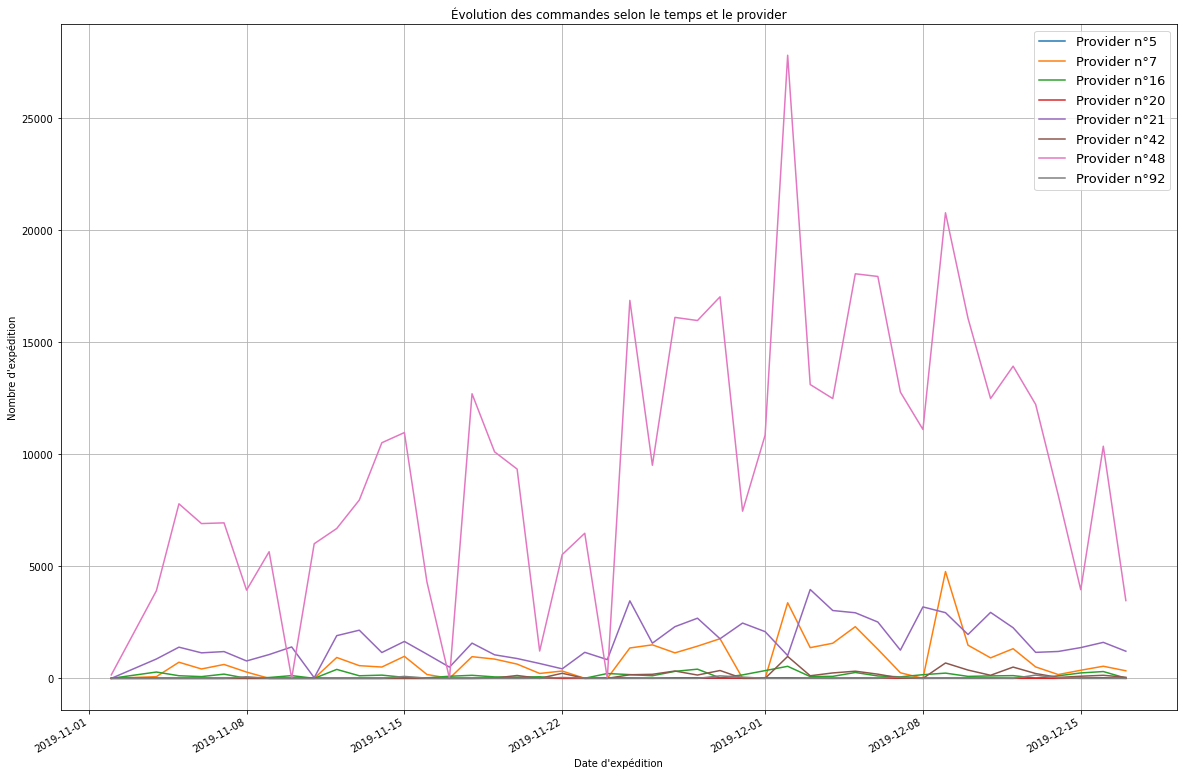

In [226]:
df2_grouped.unstack(level=-1).plot(figsize=(20, 14))
plt.xlabel("Date d'expédition")
plt.xticks()
plt.ylabel("Nombre d'expédition")
plt.legend(legend_2, prop={'size': 13})
plt.title('Évolution des commandes selon le temps et le provider')
plt.grid()

In [227]:
print('We can see that providers n°48 and 21 are the most occupied providers across time')

We can see that providers n°48 and 21 are the most occupied providers across time


In [228]:
df['providerservice_id'].unique()

[48, 16, 21, 7, 92, 42, 20, 5]
Categories (8, int64): [48, 16, 21, 7, 92, 42, 20, 5]

### Process the data : We can't put Datetime in a model so let's divide the date into features

In [229]:
df["year"] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d').dt.year
df["month"] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d').dt.month
df["day"] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d').dt.day
df["hour"] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d %H:%M').dt.hour
df["min"] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d %H:%M').dt.minute

In [230]:
df['day_of_week'] = pd.to_datetime(df['datedecreationdecommande'],format='%Y/%m/%d %H:%M').dt.dayofweek
# 0: Lundi --> 6 : Dimanche
df["isWeekend"] =  np.where(df["day_of_week"] < 5, 1, 0)
df = pd.get_dummies(data=df,columns=['day_of_week'])
df = pd.get_dummies(data=df,columns=['providerservice_id'])

,datedecreationdecommande,dateexpe,delay_seconds,delay_days,year,month,day,hour,min,isWeekend,...,day_of_week_5,day_of_week_6,providerservice_id_5,providerservice_id_7,providerservice_id_16,providerservice_id_20,providerservice_id_21,providerservice_id_42,providerservice_id_48,providerservice_id_92
0,2019-11-01 11:40:35.993,2019-11-02,44364.007,0,2019,11,1,11,40,1,...,0,0,0,0,0,0,0,0,1,0
1,2019-11-01 11:40:35.970,2019-11-02,44364.030,0,2019,11,1,11,40,1,...,0,0,0,0,0,0,0,0,1,0
2,2019-11-01 10:24:40.893,2019-11-02,48919.107,0,2019,11,1,10,24,1,...,0,0,0,0,0,0,0,0,1,0
3,2019-11-01 14:24:21.177,2019-11-02,34538.823,0,2019,11,1,14,24,1,...,0,0,0,0,0,0,0,0,1,0
4,2019-11-01 13:28:35.790,2019-11-02,37884.210,0,2019,11,1,13,28,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572836,2019-12-16 06:12:25.217,2019-12-17,64054.783,0,2019,12,16,6,12,1,...,0,0,0,0,0,0,0,0,1,0
572837,2019-12-16 06:12:25.463,2019-12-17,64054.537,0,2019,12,16,6,12,1,...,0,0,0,0,0,0,0,0,1,0
572838,2019-12-15 22:32:36.320,2019-12-17,91643.680,1,2019,12,15,22,32,0,...,0,1,0,0,0,0,0,0,1,0
572839,2019-12-15 20:06:55.067,2019-12-17,100384.933,1,2019,12,15,20,6,0,...,0,1,0,0,0,0,0,0,1,0


In [231]:
df["isOnWorkShift"] =  np.where((df["hour"] <= 18) & (df["hour"] >= 8), 1, 0)

In [232]:
df.head(10)

,datedecreationdecommande,dateexpe,delay_seconds,delay_days,year,month,day,hour,min,isWeekend,...,day_of_week_6,providerservice_id_5,providerservice_id_7,providerservice_id_16,providerservice_id_20,providerservice_id_21,providerservice_id_42,providerservice_id_48,providerservice_id_92,isOnWorkShift
0,2019-11-01 11:40:35.993,2019-11-02,44364.007,0,2019,11,1,11,40,1,...,0,0,0,0,0,0,0,1,0,1
1,2019-11-01 11:40:35.970,2019-11-02,44364.030,0,2019,11,1,11,40,1,...,0,0,0,0,0,0,0,1,0,1
2,2019-11-01 10:24:40.893,2019-11-02,48919.107,0,2019,11,1,10,24,1,...,0,0,0,0,0,0,0,1,0,1
3,2019-11-01 14:24:21.177,2019-11-02,34538.823,0,2019,11,1,14,24,1,...,0,0,0,0,0,0,0,1,0,1
4,2019-11-01 13:28:35.790,2019-11-02,37884.210,0,2019,11,1,13,28,1,...,0,0,0,0,0,0,0,1,0,1
5,2019-11-01 19:40:04.200,2019-11-02,15595.800,0,2019,11,1,19,40,1,...,0,0,0,0,0,0,0,1,0,0
6,2019-11-01 06:16:55.883,2019-11-02,63784.117,0,2019,11,1,6,16,1,...,0,0,0,0,0,0,0,1,0,0
7,2019-11-01 18:42:10.033,2019-11-02,19069.967,0,2019,11,1,18,42,1,...,0,0,0,0,0,0,0,1,0,1
8,2019-11-01 21:05:23.910,2019-11-02,10476.090,0,2019,11,1,21,5,1,...,0,0,0,0,0,0,0,1,0,0
9,2019-11-01 15:46:58.780,2019-11-02,29581.220,0,2019,11,1,15,46,1,...,0,0,0,0,0,0,0,1,0,1


## Step 2 : Process data for Modeling

In [233]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import average_precision_score as precision

In [234]:
X = df[["providerservice_id_5","providerservice_id_7","providerservice_id_16","providerservice_id_20","providerservice_id_21","providerservice_id_42","providerservice_id_48","providerservice_id_92","month","day","hour","isWeekend","isOnWorkShift","day_of_week_0","day_of_week_1","day_of_week_2","day_of_week_3","day_of_week_4","day_of_week_5","day_of_week_6"]]
y = df['delay_days']
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20)

## Step 3 : Modeling

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0) 
clf.fit(X, y)
clf_pred = clf.predict(X_test) 
clf_score = clf.score(X_test,y_test)
clf_score

0.6990695550162537

In [236]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression(fit_intercept=True)
linearReg.fit(X_train, y_train)
linearReg_pred = linearReg.predict(X_test)
linearReg_score = linearReg.score(X_test,y_test)
linearReg_score

0.3004502568462436

In [237]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(random_state=0)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_score = bagging.score(X_test,y_test)
bagging_score

0.7406449825176592

In [238]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state=0) 
simple_tree.fit(X_train, y_train)
simple_tree_pred = simple_tree.predict(X_test)
simple_tree_score = simple_tree.score(X_test,y_test)
simple_tree_score

0.7407003483753636

In [240]:
#"providerservice_id","month","day","hour","isWeekend","isOnWorkShift","day_of_week_0","day_of_week_1","day_of_week_2","day_of_week_3","day_of_week_4","day_of_week_5","day_of_week_6"
print("For an order from he provider 48, the 27th of November at 23:00 which is a Tuesday, the shipment delay is predicted "+str(round(simple_tree.predict([[0,0,0,0,0,0,1,0,11,27,23,0,1,0,1,0,0,0,0,0]])[0],2)))

For an order from he provider 48, the 27th of November at 23:00 which is a Tuesday, the shipment delay is predicted 1.51
